# **Text Classification**


## 1.import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\yousef shehab\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# df = pd.read_csv('/content/drive/MyDrive/Data sets/Text classification/train.txt', delimiter=';', header = None, names = ['sentence', 'label'])
# val_df = pd.read_csv('/content/drive/MyDrive/Data sets/Text classification/test.txt', delimiter=';', header = None, names = ['sentence', 'label'])
# ts_df = pd.read_csv('/content/drive/MyDrive/Data sets/Text classification/val.txt', delimiter=';', header = None, names = ['sentence', 'label'])


In [6]:
df = pd.read_csv('data/train.txt', delimiter=';', header = None, names = ['sentence', 'label'])
val_df = pd.read_csv('data/test.txt', delimiter=';', header = None, names = ['sentence', 'label'])
ts_df = pd.read_csv('data/val.txt', delimiter=';', header = None, names = ['sentence', 'label'])

In [7]:
df.head()

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [8]:
df['label'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [9]:
df.label.value_counts()

label
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

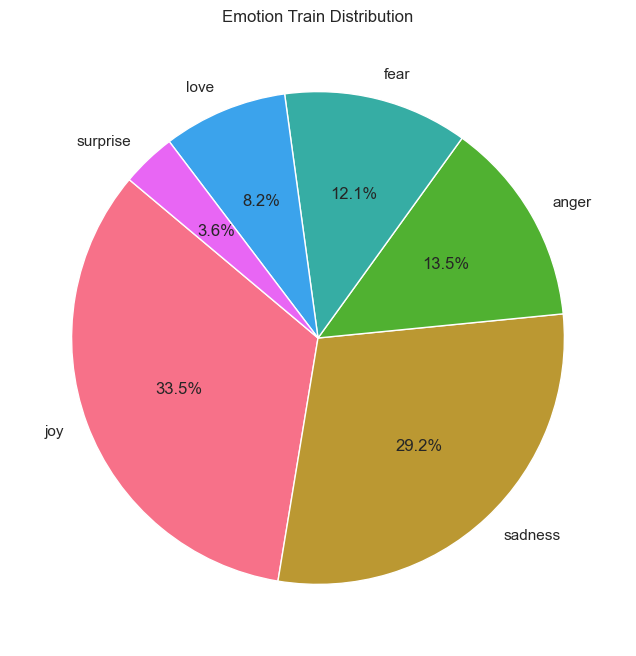

In [10]:
# Count label distributions
label_counts = df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Train Distribution')
plt.show()

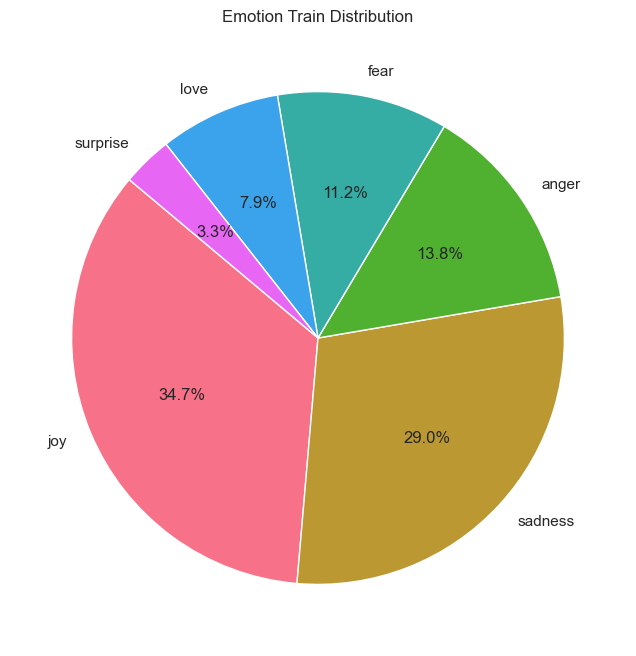

In [11]:
# Count label distributions
label_counts = val_df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Train Distribution')
plt.show()

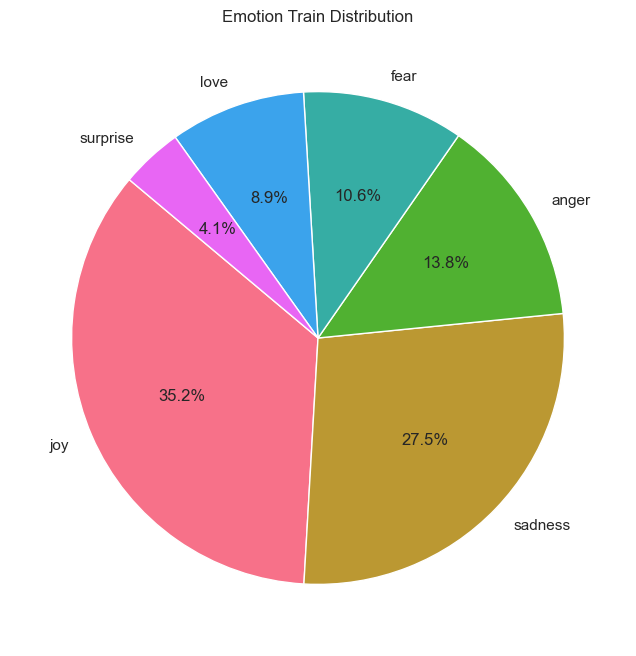

In [12]:
# Count label distributions
label_counts = ts_df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Train Distribution')
plt.show()

In [13]:
df = df[~df['label'].str.contains('love') ]
df = df[~df['label'].str.contains('surprise') ]
df.label.unique()

array(['sadness', 'anger', 'fear', 'joy'], dtype=object)

In [14]:
joy = df[ df['label']  == 'joy'  ].sample(n= 2200, random_state=20)
sad = df[ df['label']  == 'sadness'  ].sample(n= 2200, random_state=20)
fear = df[ df['label']  == 'fear'  ].sample(n= 1937, random_state=20)
anger = df[ df['label']  == 'anger'  ].sample(n= 2159, random_state=20)

df_sampled = pd.concat([joy, sad, fear, anger])

df = df_sampled.sample(frac=1, random_state=20).reset_index(drop=True)

In [15]:
df.head()

,sentence,label
0,i feel quite lucky to have stumbled upon it,joy
1,i remember feeling acutely distressed for a fe...,fear
2,i feel the need to tell you that phone calls d...,joy
3,i feel that spitting on somebody is the most v...,anger
4,i feel a little awkward about this but im goin...,sadness


In [16]:
df.label.value_counts()

label
joy        2200
sadness    2200
anger      2159
fear       1937
Name: count, dtype: int64

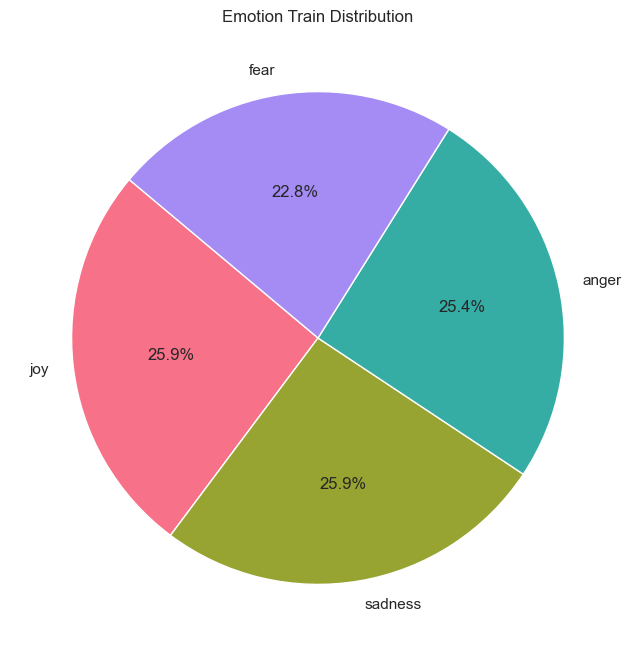

In [17]:
# Count label distributions
label_counts = df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Train Distribution')
plt.show()

In [18]:
val_df = val_df[~val_df['label'].str.contains('love')]
val_df = val_df[~val_df['label'].str.contains('surprise')]

In [19]:
joy = val_df[val_df['label'] == 'joy'].sample(n=250, random_state=20)
sad = val_df[val_df['label'] == 'sadness'].sample(n=250, random_state=20)
fear = val_df[val_df['label'] == 'fear'].sample(n=212, random_state=20)
anger = val_df[val_df['label'] == 'anger'].sample(n=275, random_state=20)

df_sampled = pd.concat([joy, sad, fear, anger])

val_df = df_sampled.sample(frac=1, random_state=20).reset_index(drop=True)

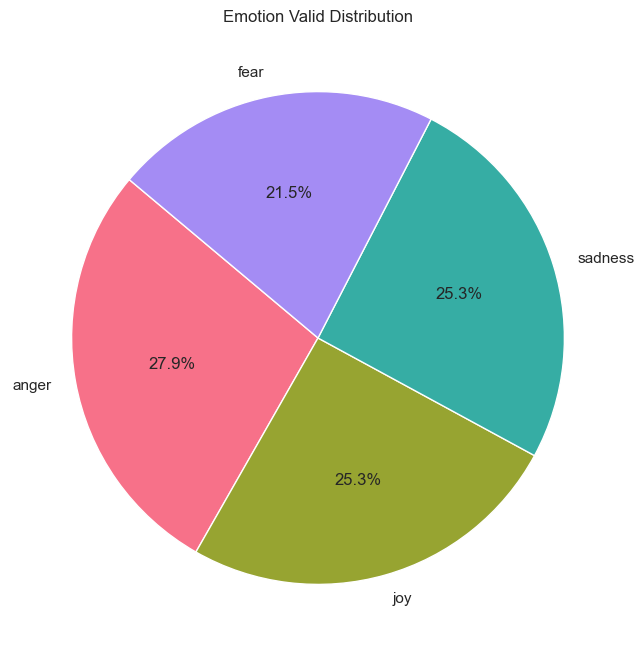

In [20]:
# Count label distributions
label_counts = val_df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Valid Distribution')
plt.show()

In [21]:
ts_df = ts_df[~ts_df['label'].str.contains('love')]
ts_df = ts_df[~ts_df['label'].str.contains('surprise')]

In [22]:
joy = ts_df[ts_df['label'] == 'joy'].sample(n=250, random_state=20)
sad = ts_df[ts_df['label'] == 'sadness'].sample(n=250, random_state=20)
fear = ts_df[ts_df['label'] == 'fear'].sample(n=212, random_state=20)
anger = ts_df[ts_df['label'] == 'anger'].sample(n=275, random_state=20)

df_sampled = pd.concat([joy, sad, fear, anger])

ts_df = df_sampled.sample(frac=1, random_state=20).reset_index(drop=True)

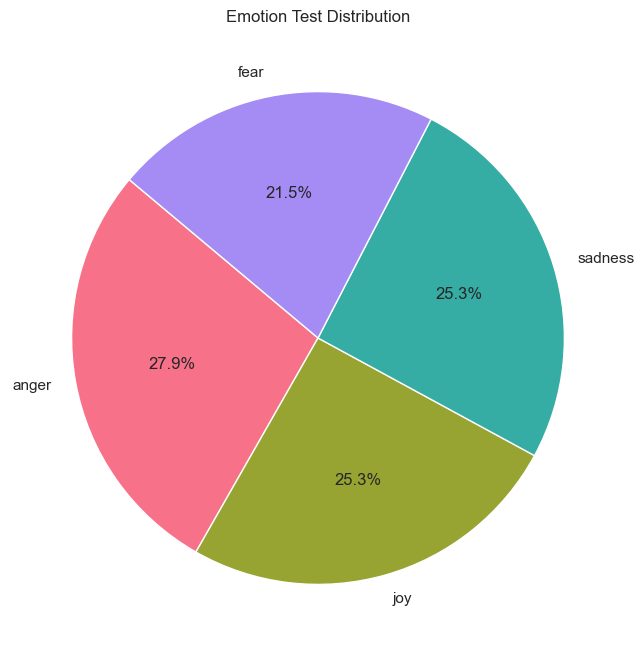

In [23]:
# Count label distributions
label_counts = ts_df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Test Distribution')
plt.show()

In [24]:
tr_text =df['sentence']
tr_label = df['label']

val_text = val_df['sentence']
val_label = val_df['label']

ts_text = ts_df['sentence']
ts_label = ts_df['label']

## Encoding (processing)

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
tr_label = encoder.fit_transform(tr_label)
val_label = encoder.fit_transform(val_label)
ts_label = encoder.fit_transform(ts_label)

In [26]:
tr_label

array([2, 1, 2, ..., 0, 0, 3])

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [28]:
# Initializing Input vector
class_vector =[2, 5, 6, 1, 4, 2, 3, 2]
print(class_vector)

output_matrix = to_categorical(class_vector, num_classes = 7)

print(output_matrix)

[2, 5, 6, 1, 4, 2, 3, 2]
[[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]]


In [29]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(tr_text)

sequences = tokenizer.texts_to_sequences(tr_text)
tr_x = pad_sequences(sequences, maxlen=100, padding='post')
tr_y = to_categorical(tr_label)

sequences = tokenizer.texts_to_sequences(val_text)
val_x = pad_sequences(sequences, maxlen=100, padding='post')
val_y = to_categorical(val_label)

sequences = tokenizer.texts_to_sequences(ts_text)
ts_x = pad_sequences(sequences, maxlen=100, padding='post')
ts_y = to_categorical(ts_label)

In [30]:
len(tokenizer.word_counts)

10628

## Embedding & Model Arch

In [31]:
vocab_size = 10628
embedding_dim = 128 # [10628, 128]
input_length = 100
num_classes = 4

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.metrics import Precision, Recall



# Build the LSTM model with enhanced architecture
model = Sequential([
    # Embedding layer to convert words into dense vectors
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length),

    # Bidirectional LSTM layer to capture context from both directions
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),  # Dropout to reduce overfitting

    # Global Max Pooling to reduce sequence length and capture key features
    GlobalMaxPooling1D(),

    # Dense layer with regularization to learn complex representations
    Dense(64, activation='relu'),
    Dropout(0.5),  # Dropout to further reduce overfitting

    # Output layer with softmax activation for multi-class classification
    Dense(num_classes, activation='softmax')
])

C:\Users\yousef shehab\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [33]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy', Precision(), Recall()]
)

In [34]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Define early stopping to prevent overfitting based on validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model using training data and validation data
history = model.fit(
    tr_x, tr_y,  # Training inputs and outputs
    epochs=20,  # Maximum number of epochs
    batch_size=32,  # Batch size for training
    validation_data=(val_x, val_y),  # Validation data for monitoring
    callbacks=[early_stopping]  # Early stopping callback
)

Epoch 1/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 23s 66ms/step - accuracy: 0.3140 - loss: 1.3370 - precision: 0.3256 - recall: 0.0346 - val_accuracy: 0.9129 - val_loss: 0.4254 - val_precision: 0.9644 - val_recall: 0.8521
Epoch 2/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.9232 - loss: 0.2680 - precision: 0.9398 - recall: 0.9030 - val_accuracy: 0.9534 - val_loss: 0.1755 - val_precision: 0.9688 - val_recall: 0.9453
Epoch 3/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - accuracy: 0.9702 - loss: 0.1169 - precision: 0.9747 - recall: 0.9620 - val_accuracy: 0.9443 - val_loss: 0.1593 - val_precision: 0.9605 - val_recall: 0.9372
Epoch 4/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.9810 - loss: 0.0747 - precision: 0.9825 - recall: 0.9786 - val_accuracy: 0.9412 - val_loss: 0.1480 - val_precision: 0.9514 - val_recall: 0.9321
Epoch 5/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.9868 - loss: 0.0497 - precision: 0.9882 - recall: 0.9855 - val_accuracy: 0.9402 - va

In [36]:
# Evaluate the model on the test set
test_loss, test_accuracy, percision, recall = model.evaluate(ts_x, ts_y, verbose=2)
print(f'Test Accuracy: {test_accuracy:.2f}')

31/31 - 1s - 17ms/step - accuracy: 0.9352 - loss: 0.1831 - precision: 0.9463 - recall: 0.9281
Test Accuracy: 0.94


In [37]:
y_true = []

for  i in range(len(ts_y)):

  x = np.argmax(ts_y[i])
  y_true.append(x)

In [38]:
preds = model.predict(ts_x)
y_pred = np.argmax(preds, axis=1)
y_pred

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


array([2, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 3, 0, 2, 2, 1, 2, 2, 2, 3, 2, 0,
       3, 1, 3, 0, 3, 1, 3, 2, 3, 2, 1, 1, 3, 3, 2, 3, 1, 2, 3, 3, 3, 3,
       1, 1, 0, 3, 0, 0, 2, 1, 0, 3, 0, 1, 1, 1, 3, 1, 1, 0, 1, 0, 3, 2,
       2, 3, 2, 2, 1, 3, 1, 1, 0, 3, 0, 3, 3, 0, 1, 0, 1, 3, 3, 1, 1, 3,
       0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 3, 1, 0, 0, 1, 2, 2, 2, 0, 0, 1,
       2, 0, 1, 2, 1, 3, 1, 1, 0, 0, 3, 2, 2, 2, 2, 1, 0, 3, 3, 1, 1, 3,
       0, 3, 0, 3, 2, 0, 0, 1, 1, 3, 1, 0, 2, 3, 0, 0, 1, 0, 2, 3, 1, 3,
       2, 3, 2, 0, 2, 3, 0, 2, 3, 2, 0, 2, 2, 2, 2, 2, 1, 0, 3, 0, 2, 0,
       3, 3, 0, 0, 2, 3, 3, 2, 2, 2, 0, 1, 0, 0, 2, 0, 3, 0, 1, 0, 3, 3,
       3, 2, 3, 0, 1, 1, 3, 1, 0, 0, 3, 1, 1, 2, 0, 0, 0, 3, 3, 0, 2, 2,
       0, 0, 2, 0, 3, 3, 2, 1, 1, 2, 1, 0, 3, 3, 1, 3, 2, 1, 3, 2, 0, 2,
       0, 1, 3, 3, 0, 1, 1, 1, 2, 2, 3, 3, 1, 2, 1, 2, 0, 2, 2, 3, 2, 3,
       2, 2, 3, 1, 3, 3, 3, 3, 1, 2, 0, 3, 1, 0, 3, 3, 2, 3, 0, 3, 1, 2,
       2, 0, 2, 2, 0, 2, 2, 3, 0, 3, 1, 3, 0, 3, 0,

<Axes: >

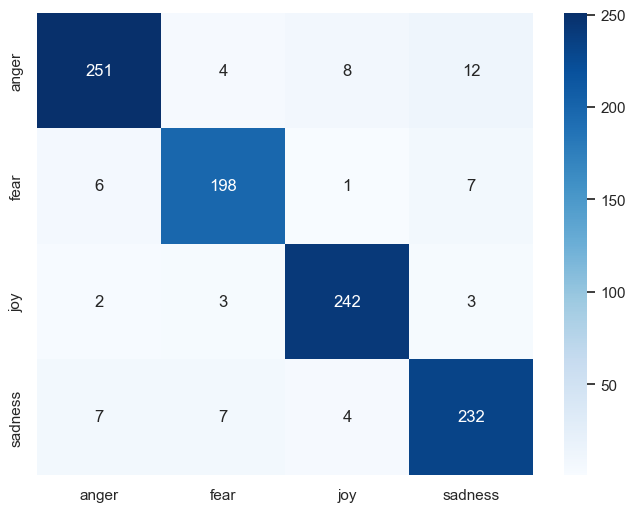

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

plt.figure(figsize=(8,6))
emotions = {0: 'anger', 1: 'fear', 2: 'joy', 3:'sadness'}
emotions = list(emotions.values())
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)

In [40]:
import pickle
with open('tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

model.save('LSTM_model.h5')

In [41]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.models import load_model

In [42]:
def predict(text, model_path, token_path):

    model = load_model(model_path)


    with open(token_path, 'rb') as f:
        tokenizer = pickle.load(f)

    sequences = tokenizer.texts_to_sequences([text])
    x_new = pad_sequences(sequences, maxlen=100)
    predictions = model.predict(x_new)

    emotions = {0: 'anger', 1: 'fear', 2: 'joy', 3:'sadness'}

    label = list(emotions.values())
    probs = list(predictions[0])

    labels = label

    plt.subplot(1, 1, 1)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


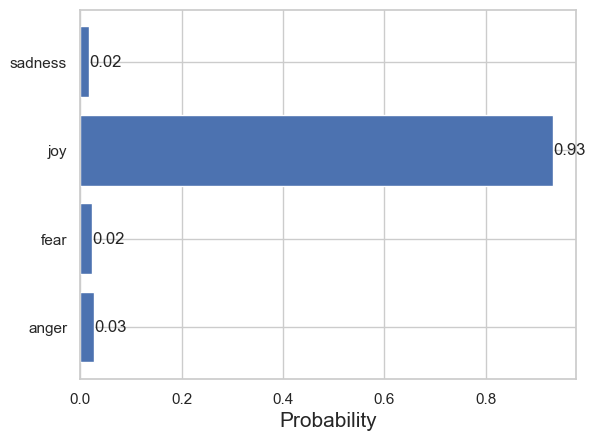

In [43]:
txt = 'I am very happy to finish this project'
predict(txt, 'LSTM_model.h5', 'tokenizer.pkl')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


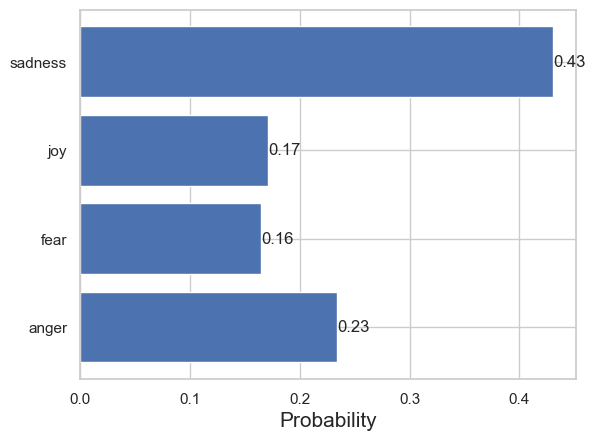

In [44]:
txt = 'I am very sad'
predict(txt, 'LSTM_model.h5', 'tokenizer.pkl')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


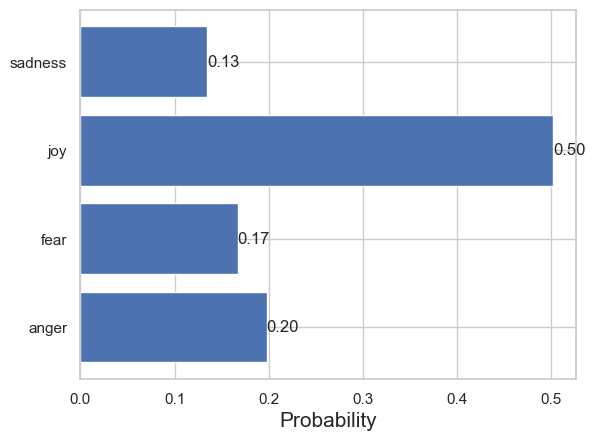

In [45]:
txt = 'Ahhhhhhhhhhhh, I wanna kill myself.'
predict(txt, 'LSTM_model.h5', 'tokenizer.pkl')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


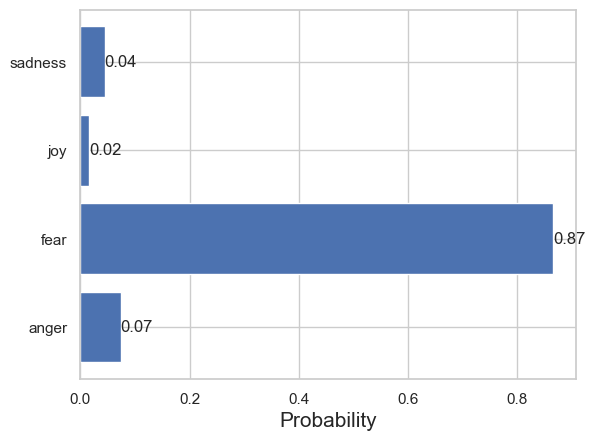

In [46]:
txt = 'I think, i am afraid.'
predict(txt, 'LSTM_model.h5', 'tokenizer.pkl')